# Introduction

Introduction:

Yulu, India's pioneering micro-mobility service provider, has embarked on a mission to
revolutionize daily commutes by offering unique, sustainable transportation solutions.
However, recent revenue setbacks have prompted Yulu to seek the expertise of a consulting
company to delve into the factors influencing the demand for their shared electric cycles,
specifically in the Indian market

Objective:

Strategic Expansion: Yulu's decision to enter the Indian market is a strategic move to
expand its global footprint. Understanding the demand factors in this new market is
essential to tailor their services and strategies accordingly.

Revenue Recovery: Yulu's recent revenue decline is a pressing concern. By analyzing the
factors affecting demand for shared electric cycles in the Indian market, they can make
informed adjustments to regain profitability.


# Data Structure & Characteristics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("bike_sharing.csv")
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
# Check for duplicate rows if any

np.any(df.duplicated())

False

**Column Profiling:**

● datetime: datetime

● season: season (1: spring, 2: summer, 3: fall, 4: winter)

● holiday : whether day is a holiday or not

● workingday : if day is neither weekend nor holiday is 1, otherwise is 0.

● weather:

  o 1: Clear, Few clouds, partly cloudy

  o 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

  o 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

  o 4: Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog

● temp: temperature in Celsius

● atemp: feeling temperature in Celsius

● humidity: humidity

● windspeed: wind speed

● casual: count of casual users

● registered: count of registered users

● count: count of total rental bikes including both casual and registered

Considering the type of data provided in Column Profiling, will need to convert some columns data types for proper analysis:

1. datetime to  date_time
2. season to categorical
3. holiday to categorical
4. working day to categorical
5. weather to categorical

In [5]:
df['datetime'] = pd.to_datetime(df['datetime'])
cat_cols= ['season', 'holiday', 'workingday', 'weather']
for col in cat_cols:
  df[col] = df[col].astype('object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


In [7]:
df.describe(include='all')

<ipython-input-7-174ba9bf1a5c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.0,10886.0,10886.0,10886.0,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,4.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,2734.0,10575.0,7412.0,7192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-19 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,NaN,NaN,NaN,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000


INSIGHTS:

1. There are total of 10886 rows and 12 columns
2. No Null values
3. No Duplicate rows
4. Standard Deviation is observed to be quite high in case of casual and registered signifying considerable amount of outliers in such cases
5. Changed required data types of some columns for proper analysis

#Identification & Treatment of Outliers

  Using Box Plot / IQR

In [8]:
df1=df.copy()

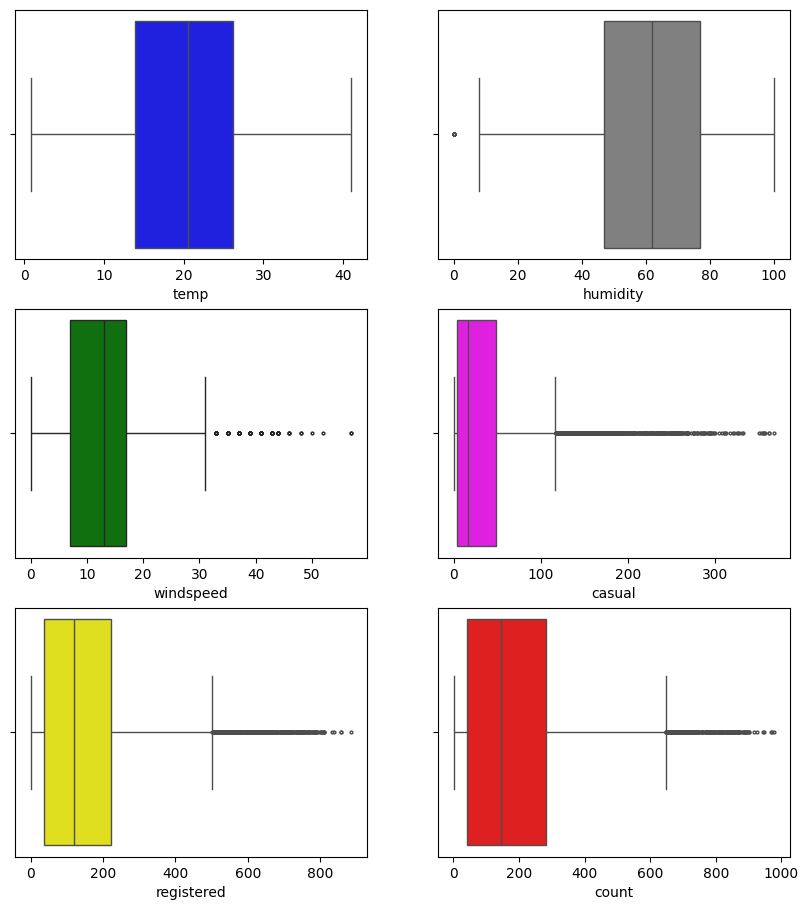

In [9]:
columns = ['temp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
colors = np.random.permutation(['red', 'blue', 'green', 'magenta',
                                'yellow', 'gray'])
count = 1
plt.figure(figsize = (10, 11))
for i in columns:
    plt.subplot(3, 2, count)
    #plt.title(f"Detecting outliers in '{i}' column")
    sns.boxplot(data = df1, x = df1[i], color = colors[count - 1],fliersize=2)
    plt.plot()
    count += 1

In [10]:
numerical_columns = df1.select_dtypes(include=['number']).columns

# Calculate Q1, Q3, and IQR for numerical columns
Q1 = df1[numerical_columns].quantile(0.25)
Q3 = df1[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Filter based on IQR for numerical columns
dfiqr = df1[~((df1[numerical_columns] < (Q1 - 1.5 * IQR)) |
 (df1[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [11]:
numerical_columns

Index(['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered',
       'count'],
      dtype='object')

In [12]:
dfiqr

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [13]:
dfiqr.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,9518.000000,9518.000000,9518.000000,9518.000000,9518.000000,9518.000000,9518.000000
mean,19.589971,22.987399,63.737025,12.133336,23.955033,126.181025,150.136058
std,7.686871,8.361526,18.693175,7.437481,26.956046,114.116911,131.586548
min,0.820000,0.760000,8.000000,0.000000,0.000000,0.000000,1.000000
25%,13.120000,15.910000,49.000000,7.001500,3.000000,28.250000,34.000000
50%,18.860000,22.725000,64.500000,11.001400,13.000000,101.000000,122.000000
75%,26.240000,30.305000,79.000000,16.997900,37.000000,187.000000,231.000000
max,41.000000,45.455000,100.000000,31.000900,116.000000,501.000000,590.000000


INSIGHTS:

1. Box Plot show clear outliers in windspeed, casual, register and count
2. No outlier in temp
3. Negligible outliers in humidity
4. Using IQR method outliers have been reduced beyond upper and lower whisker, outliers are considerably reduced followed by reduction in standard deviation

# Distribution of Categorical & Numerical Variables

For Categorical columns

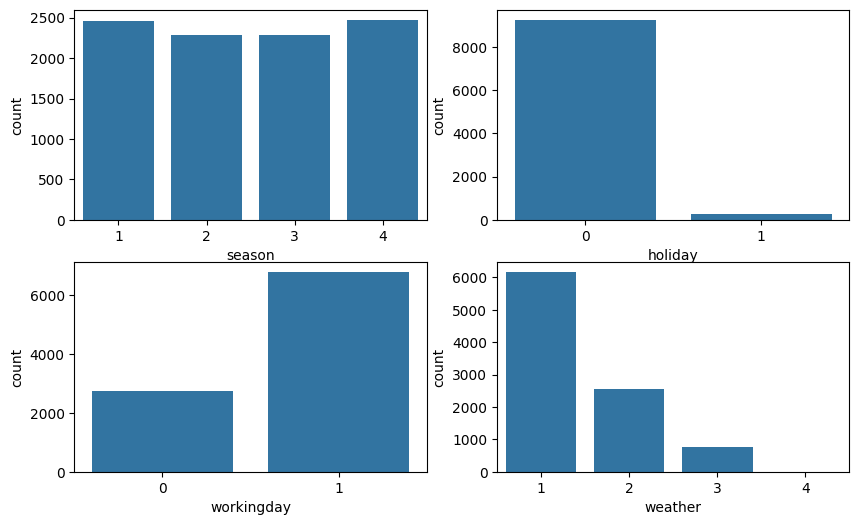

In [14]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
index = 0
for row in range(2):
  for col in range(2):
    sns.countplot(data=dfiqr, x=cat_cols[index], ax=axis[row, col])
    index += 1
plt.show()

In [15]:
np.round(dfiqr['season'].value_counts(normalize = True) * 100, 2)

4    26.00
1    25.88
2    24.08
3    24.04
Name: season, dtype: float64

In [16]:
np.round(dfiqr['holiday'].value_counts(normalize = True) * 100, 2)

0    97.33
1     2.67
Name: holiday, dtype: float64

In [17]:
np.round(dfiqr['workingday'].value_counts(normalize = True) * 100, 2)

1    71.34
0    28.66
Name: workingday, dtype: float64

In [18]:
np.round(dfiqr['weather'].value_counts(normalize = True) * 100, 2)

1    64.89
2    26.98
3     8.12
4     0.01
Name: weather, dtype: float64

INSIGHTS:
1. All four seasons carry almost equal weightage i.e season do not make any difference in the usage of electric bikes
2. Maximum usage i.e 97% is done on non-holiday day.
3. 71% of usage is done on working days
4. Maximum usage i.e 65% has been done on a clear, partly cloudy day which is most suited for bike ride

For Numerical Columns

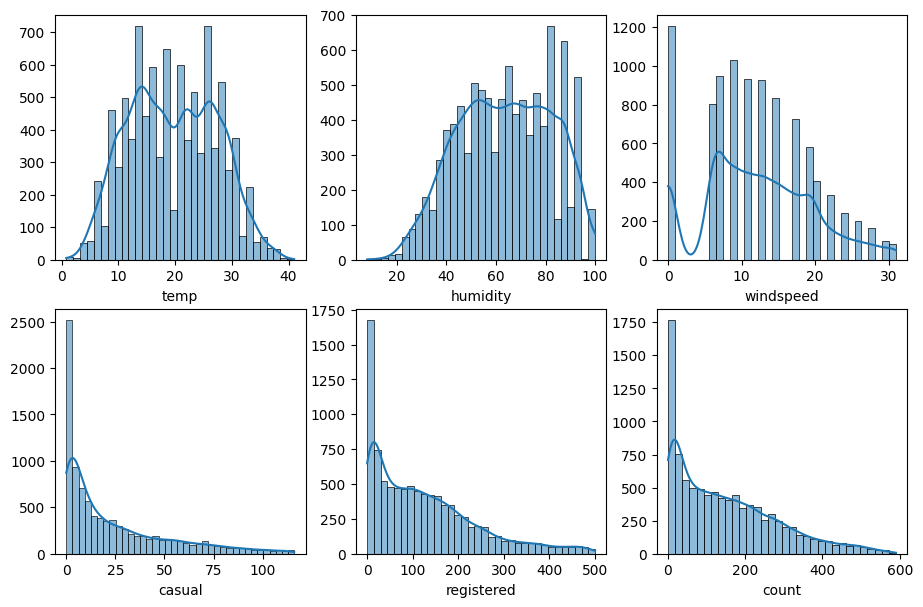

In [19]:
num_cols = ['temp', 'humidity', 'windspeed', 'casual',
'registered','count']
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(11, 7))
index = 0
for row in range(2):
  for col in range(3):
    sns.histplot(dfiqr[num_cols[index]], ax=axis[row, col], kde=True)
    axis[row,col].set_ylabel('')
    index += 1
plt.show()

INSIGHTS:
1. temp and humidity closely resembling normal distribution
2. windspeed is indicating binomial distribution
3. casual, registered and count are right skewed following log-normal or exponential distribution


Average Count of bikes on an hourly basis in a day

[]

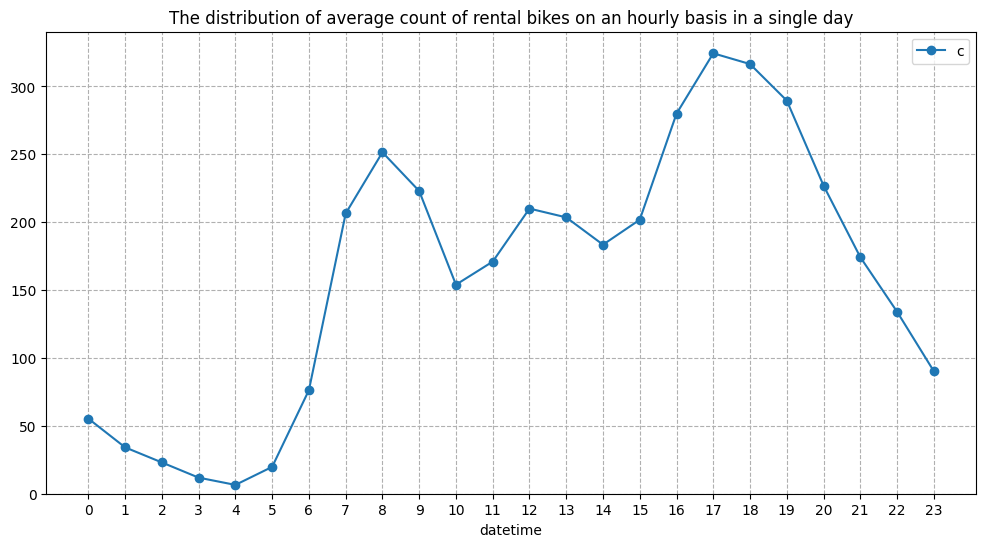

In [94]:
plt.figure(figsize = (12, 6))
plt.title("The distribution of average count of rental bikes on an hourly basis in a single day")
df.groupby(by = dfiqr['datetime'].dt.hour)['count'].mean().plot(kind = 'line', marker = 'o')
plt.ylim(0,)
plt.xticks(np.arange(0, 24))
plt.legend('count')
plt.grid(axis = 'both', linestyle = '--')
plt.plot()

INSIGHTS:
1. Morning time 7-9 AM and evening 5-7 PM show maximum usage.
2. Above spikes can be due to school / office hours in morning and office closing hours in evening
3. Appropriate charges and supply chain can be planned using this information

Average Monthly distribution of count of bikes

[]

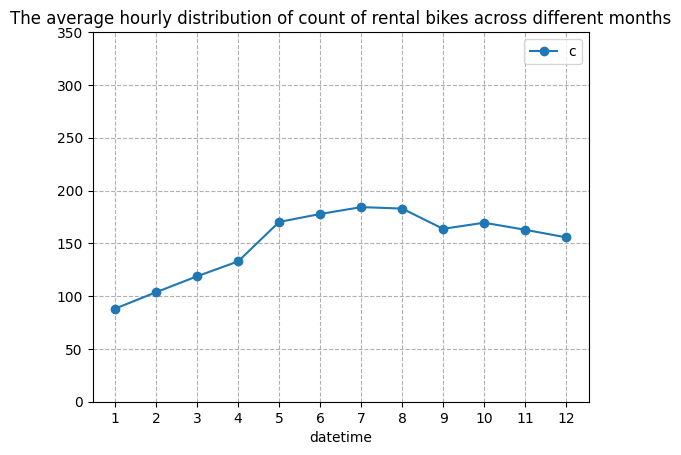

In [92]:
#plt.figure(figsize = (12, 6))
plt.title("The average hourly distribution of count of rental bikes across different months")
df.groupby(by = dfiqr['datetime'].dt.month)['count'].mean().plot(kind = 'line', marker = 'o')

plt.ylim(0,)    # Setting the y-axis limits to start from zero
plt.xticks(np.arange(1, 13))   # Setting the x-ticks to represent the months from 1 to 12
plt.legend('count')    # Adding a legend to the plot for the 'count' line.
plt.yticks(np.arange(0, 400, 50))
# Adding gridlines to both the x and y axes with a dashed line style
plt.grid(axis = 'both', linestyle = '--')
plt.plot()     # Displaying the plot.

INSIGHTS:
1. Count of bikes is highest in the month of July followed by August and June
2. Usage of bikes is least in the month of January
3. Inventory can be planned accordingly to meet demand during peak months

**Bi-Variate Analysis**

Understanding usage of bikes in each season on a working day and non-working day

[]

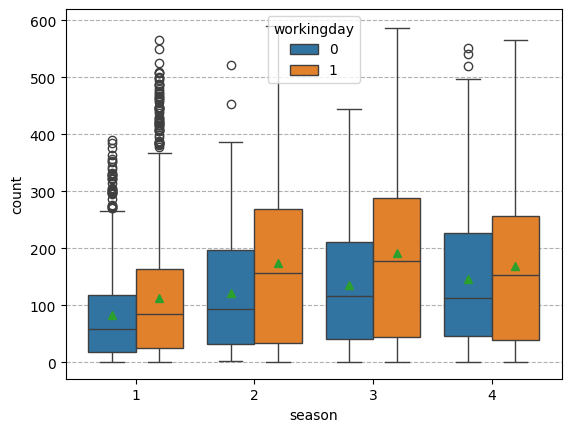

In [20]:

sns.boxplot(data = dfiqr, x = 'season', y = 'count', hue = 'workingday', showmeans = True)
plt.grid(axis = 'y', linestyle = '--')
plt.plot()

INSIGHTS:
1. The count of rental bikes is mostly in fall and summer, specifically on a working day
2. Usage of bikes is least in spring season

Understanding usage of bikes in each weather type on a working and a non-working day

[]

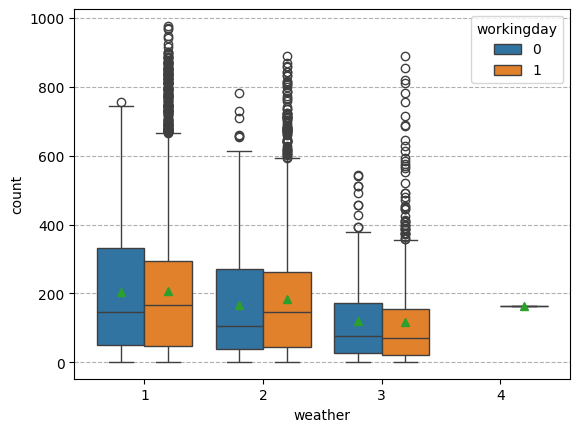

In [21]:
sns.boxplot(data = df, x = 'weather', y = 'count', hue = 'workingday', showmeans = True)
plt.grid(axis = 'y', linestyle = '--')
plt.plot()

INSIGHTS:
1. The bikes are rented most in clear,partly cloudy weather esp. on a non-working day
2. Rented least in heavy rain, thunderstorm for obvious reasons

# Understanding Correlation Among Variables

- Pair Plot
- Correlation
- Heatmap

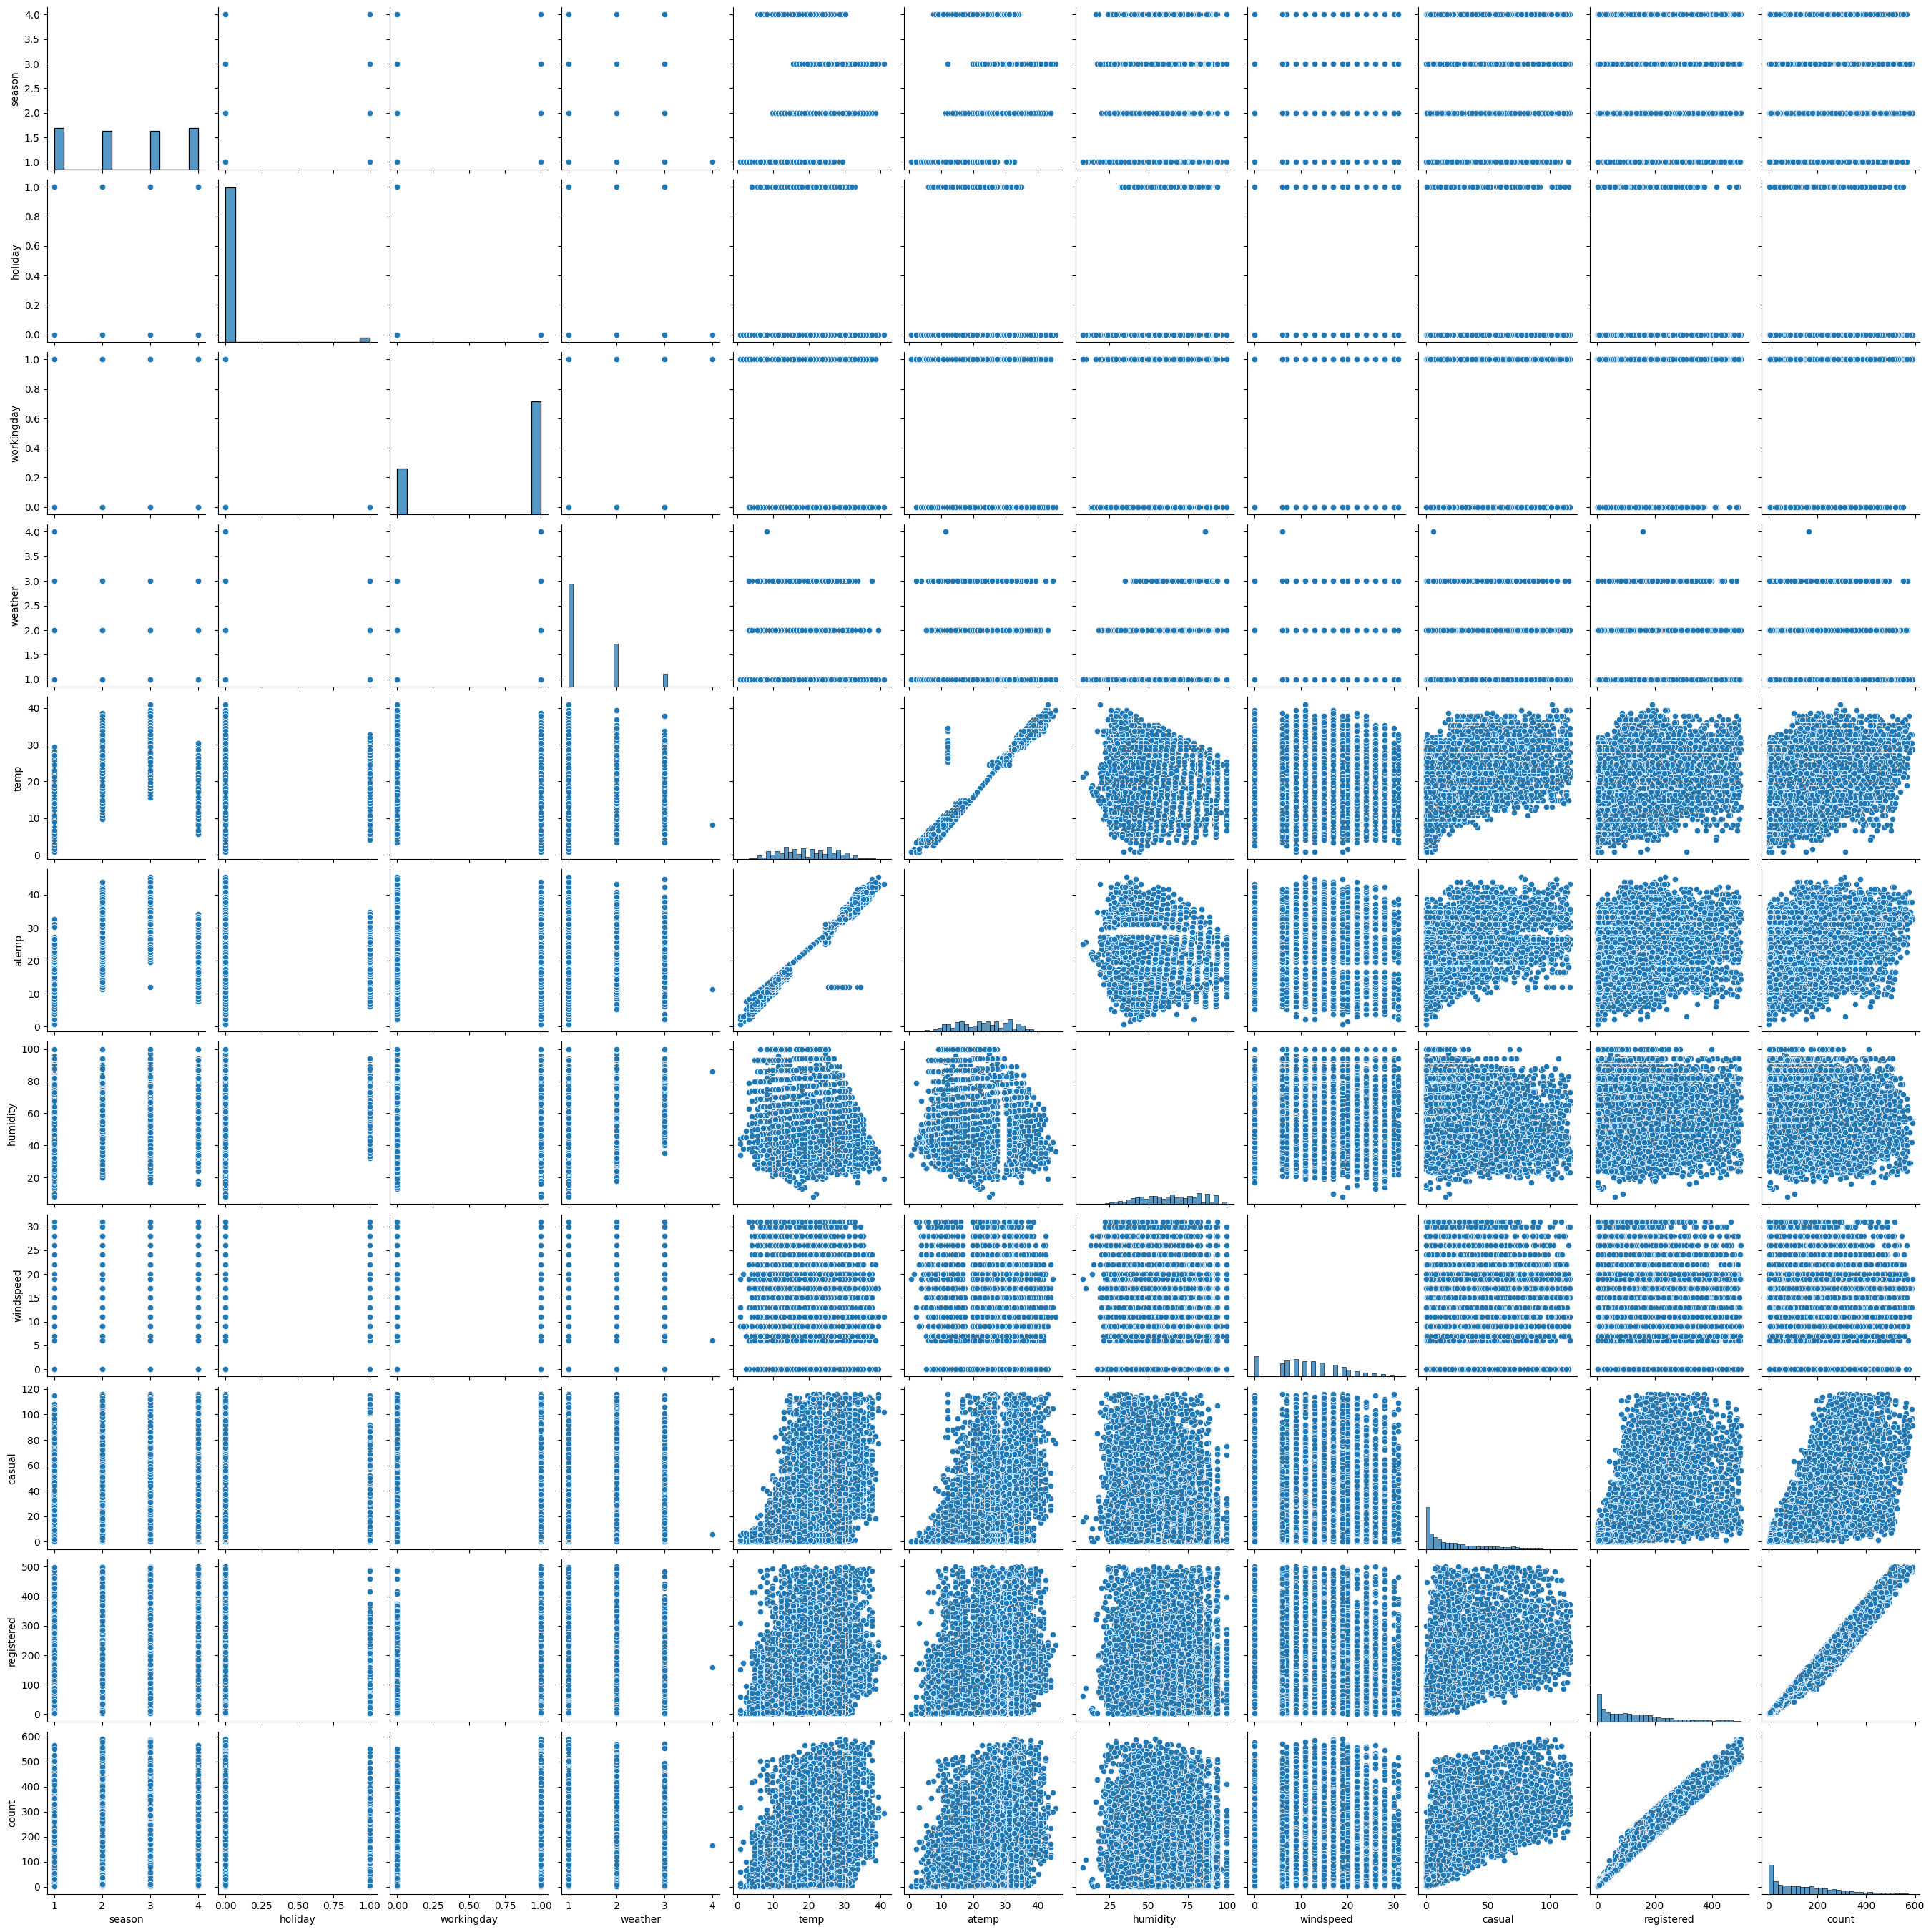

In [22]:
sns.pairplot(data=dfiqr )

In [23]:
dfiqr.corr()

<ipython-input-23-10ddd9281f93>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfiqr.corr()


,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.986415,-0.012123,-0.017049,0.515266,0.276560,0.345398
atemp,0.986415,1.000000,0.006011,-0.058533,0.508335,0.273281,0.341134
humidity,-0.012123,0.006011,1.000000,-0.302630,-0.335487,-0.262876,-0.296702
windspeed,-0.017049,-0.058533,-0.302630,1.000000,0.112429,0.109959,0.118392
casual,0.515266,0.508335,-0.335487,0.112429,1.000000,0.579577,0.707486
registered,0.276560,0.273281,-0.262876,0.109959,0.579577,1.000000,0.985967
count,0.345398,0.341134,-0.296702,0.118392,0.707486,0.985967,1.000000


<ipython-input-24-39700a6277f3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dfiqr.corr(), cmap = 'Blues', annot = True, vmin = -1, vmax = 1)


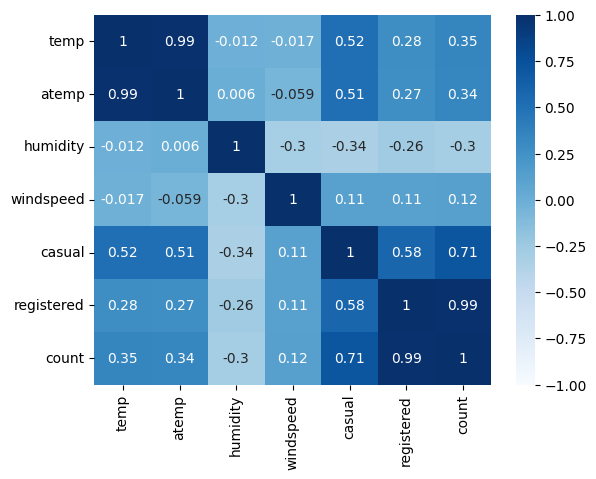

In [24]:
#plt.figure(figsize = (12, 8))
sns.heatmap(dfiqr.corr(), cmap = 'Blues', annot = True, vmin = -1, vmax = 1)
plt.show()

INSIGHTS:
1. [temp,atemp] are highly correlated
2. High positive correlation exists between columns [casual, count] and [registered ,count]
3. Moderate positive correlation between [casual,registered], [temp,count]
4. Low correlation between [temp,registered] , [windspeed,count]

#Hypothesis Testing

**Check if there any significant difference between the no. of bike rides on Working days and non-Working days?**

In [25]:
dfiqr.groupby(by = 'workingday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,2728.0,120.681085,106.747811,1.0,31.0,89.0,188.0,551.0
1,6790.0,161.970103,138.588572,1.0,35.0,138.0,249.0,590.0


[]

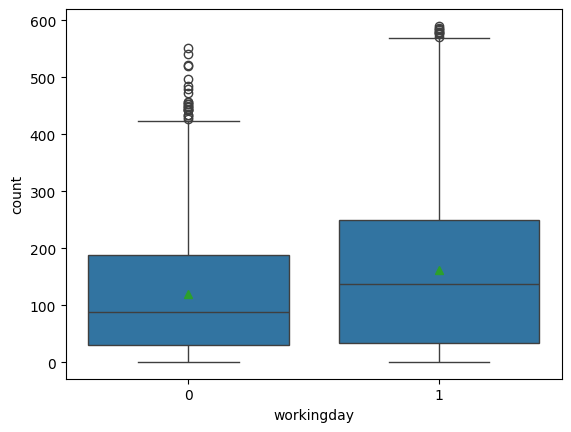

In [26]:
sns.boxplot(data = dfiqr, x = 'workingday', y = 'count', showmeans = True)
plt.plot()

**STEP-1** : Set up Null Hypothesis

**Null Hypothesis ( H0 )** - There is no significant difference in no. of bike rides on a Working and a non-Working day

**Alternate Hypothesis ( HA )** - There is significant difference in no. of bike rides on  working and non-working day

**STEP-2** : Checking for Test Statistics

Since the number of bike rides on a working day and a non-working day are independent of each other and we have to compare these two categories vs numerical, so we can go for **Independent T-Test** for this analysis

**STEP-3**: Setting Significance level to 5% , alpha = 0.05

**STEP-4**: Compute Test Statistics and P-Value.

**STEP-5**: Compare P-Value to Significance level

Based on p-value, we will accept or reject H0

p-val > alpha : Fail to reject H0

p-val < alpha : Reject H0

In [27]:
from scipy.stats import ttest_ind

In [28]:
working = dfiqr[dfiqr["workingday"]==1]["count"]
nonworking = dfiqr[dfiqr["workingday"]==0]["count"]

In [95]:
tstat,p_val=ttest_ind(working,nonworking)

In [30]:
print('P-value :',p_val)
if p_val < 0.05:
    print('Reject H0:There is significant difference in no. of bike rides on working and non-working day ')
else:
    print('Fail to Reject H0: There is no significant difference in no. of bike rides on working and non-working day ')

P-value : 5.384896180235767e-44
Reject H0:There is significant difference in no. of bike rides on working and non-working day 


In [31]:
test_stat,p_value=ttest_ind(working,nonworking,alternative='greater')

In [32]:
print('P-value :',p_value)
if p_value < 0.05:
    print('Reject H0: Working Days have greater number of bike rides than Non-Working Days')
else:
    print('Fail to Reject H0: Number of bike rides is same for both working and non-working days')

P-value : 2.6924480901178837e-44
Reject H0: Working Days have greater number of bike rides than Non-Working Days


INSIGHTS:
1. P-Value is much lesser than significance level or alpha. Therefore, null Hypothesis is rejected i.e There is significant difference in number of bike rides on working days and non-working days
2. In the second calculation of p-value and test statistic ,it is clearly inferred that working days have more mean number of bike rides than non-working days


**Check if the demand of bicycles on rent is the same for different Weather conditions?**

In [33]:
dfiqr.groupby(by = 'weather')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,6176.0,157.522021,135.224946,1.0,35.0,132.0,242.0,590.0
2,2568.0,146.805685,127.190755,1.0,35.0,120.0,226.0,568.0
3,773.0,102.170763,103.066276,1.0,23.0,70.0,149.0,569.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


[]

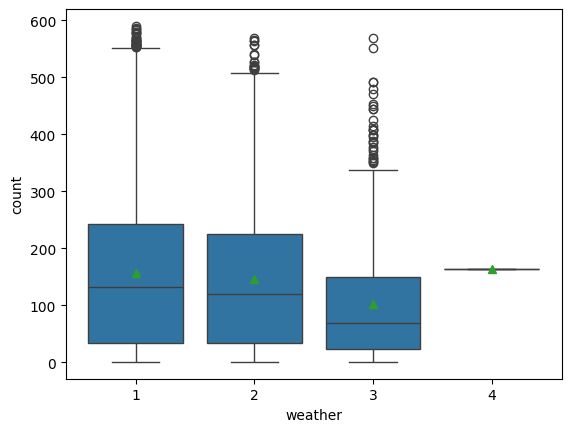

In [34]:
sns.boxplot(data = dfiqr, x = 'weather', y = 'count', showmeans = True)
plt.plot()

**STEP-1** : Set up Null Hypothesis

Null Hypothesis ( H0 ) - There is no significant difference in no. of bike rides under four unique weather conditions

Alternate Hypothesis ( HA ) - There is significant difference in no. of bike rides under four unique weather conditions

**STEP-2** : Checking for Test Statistics

We have to compare count of bike rides under 4 unique weather conditions, which means categories are more than 2. In such case we will go for **One-way Anova Test**

**STEP-3**: Setting Significance level to 5% i.e alpha=0.05

**STEP-4**: Compute Test Statistics and P-Value.

**STEP-5**: Compare P-Value to Significance level

Based on p-value, we will accept or reject H0

p-val > alpha : Fail to reject H0

p-val < alpha : Reject H0

Anova Test Assumptions:
1. Gaussian- Histogram / QQ Plot / Shapiro-Wilk's Test
2. Independence
3. Equal Variance in different groups

If assumptions are not held then apply **Kruskal-Wallis Test**

In [35]:
w1= dfiqr[dfiqr['weather']==1]['count']
w2= dfiqr[dfiqr['weather']==2]['count']
w3= dfiqr[dfiqr['weather']==3]['count']
w4= dfiqr[dfiqr['weather']==4]['count']
len(w1),len(w2),len(w3),len(w4)

(6176, 2568, 773, 1)

We will not consider weather 4 for Anova Test since it has only 1 data point

*Check Distribution using Histogram*

[]

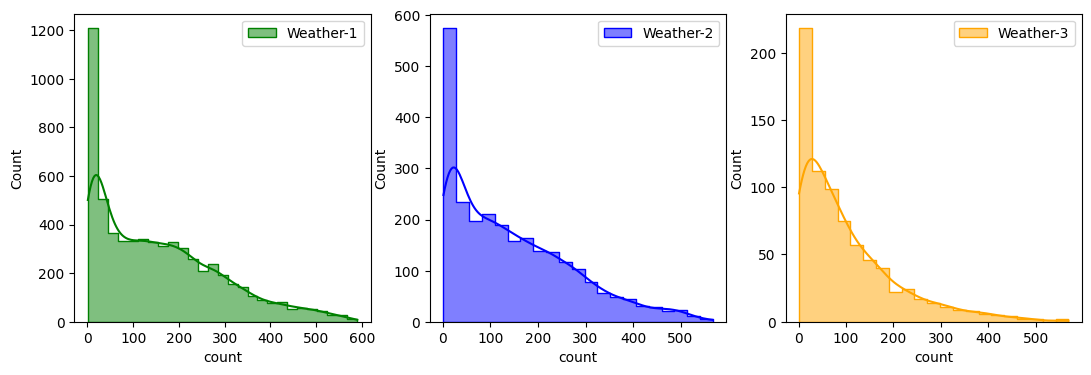

In [36]:
plt.figure(figsize = (13, 4))
plt.subplot(1, 3, 1)
sns.histplot(w1,element = 'step', color = 'green',
             kde = True, label = 'Weather-1')
plt.legend()
plt.subplot(1, 3, 2)
sns.histplot(w2,element = 'step', color = 'blue',
             kde = True, label = 'Weather-2')
plt.legend()
plt.subplot(1, 3, 3)
sns.histplot(w3,element = 'step', color = 'orange',
             kde = True, label = 'Weather-3')
plt.legend()
plt.plot()

* All the three distributions are right skewed and do not follow normal distribution

*Check Distribution using QQ Plot*

In [37]:
from statsmodels.graphics.gofplots import qqplot
import scipy.stats as spy

[]

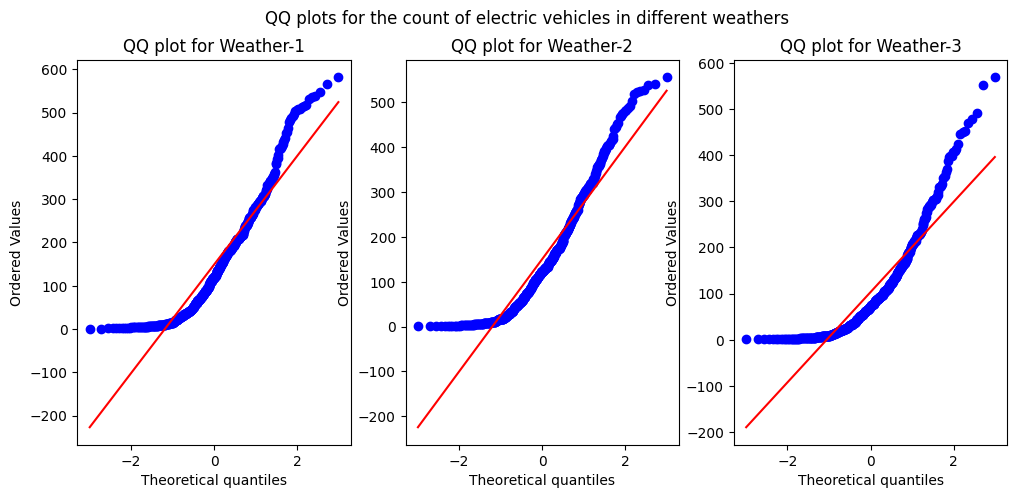

In [113]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 3, 1)
plt.suptitle('QQ plots for the count of electric vehicles in different weathers')
spy.probplot(w1.sample(500), plot = plt, dist = 'norm')
plt.title('QQ plot for Weather-1')
plt.subplot(1, 3, 2)
spy.probplot(w2.sample(500), plot = plt, dist = 'norm')
plt.title('QQ plot for Weather-2')
plt.subplot(1, 3, 3)
spy.probplot(w3.sample(500), plot = plt, dist = 'norm')
plt.title('QQ plot for Weather-3')
plt.plot()

* Above QQ Plots are not linear and therefore do not follow normal distribution

*Check Distribution using **Shapiro-Wilk** Test*

H0: The sample follow Normal Distribution

H1: The sample do not follow Normal Distribution

alpha = 0.05

In [39]:
from scipy.stats import shapiro

In [40]:
s1,p1=shapiro(w1.sample(500))
s2,p2=shapiro(w2.sample(500))
s3,p3=shapiro(w3.sample(500))
p1,p2,p3

(9.342007902188852e-16, 3.680376684665656e-17, 1.8186361443641756e-21)

In [41]:
print('P-value :',p1)
if p_value < 0.05:
    print('Reject H0: The sample do not follow Normal Distribution')
else:
    print('Fail to Reject H0: The sample follow Normal Distribution')

P-value : 9.342007902188852e-16
Reject H0: The sample do not follow Normal Distribution


Check Homogeneity of Variances using **Levene's Test**

In [42]:
# Null Hypothesis(H0) - Homogenous Variance

# Alternate Hypothesis(HA) - Non Homogenous Variance

test_stat, p_value = spy.levene(w1.sample(500),w2.sample(500),w3.sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 3.0089868724303356e-14
The samples do not have  Homogenous Variance


Since the samples are not normally distributed and do not have the same variance, f_oneway test cannot be performed here, we can perform its non parametric equivalent test i.e., **Kruskal-Wallis** test for independent samples.

In [43]:
# Ho : Mean no. of bikes is same for different weather
# Ha : Mean no. of bikes is different for different weather
# Assuming significance Level to be 0.05
alpha = 0.05
test_stat, p_value = spy.kruskal(w1,w2,w3)
print('Test Statistic =', test_stat)
print('p value =', p_value)

Test Statistic = 115.80878346080586
p value = 7.1193803165392e-26


In [44]:
if p_value < alpha:
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Reject Null Hypothesis


INSIGHTS:

Average No. of bike rides are statistically different for different weather conditions. Therefore, marketing strategy and service support can be planned accordingly

**Check if the demand of bicycles on rent is the same for different Seasons?**

In [45]:
dfiqr.groupby(by = 'season')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2463.0,103.164028,101.351256,1.0,22.5,76.0,151.00,566.0
2,2292.0,160.360820,136.243867,1.0,34.0,136.5,250.25,590.0
3,2288.0,177.151661,141.381497,1.0,43.0,162.0,274.00,587.0
4,2475.0,162.437172,132.658631,1.0,42.0,140.0,245.00,566.0


[]

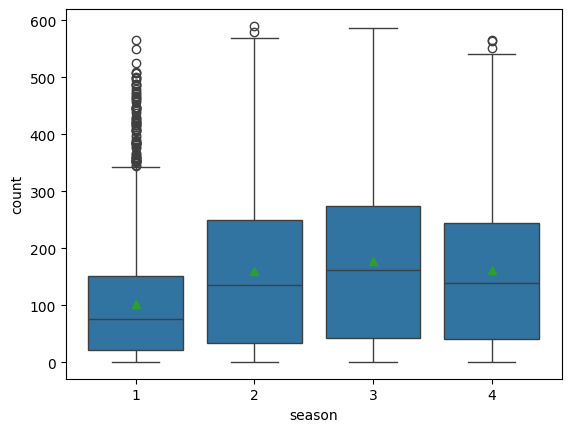

In [46]:
sns.boxplot(data = dfiqr, x = 'season', y = 'count', showmeans = True)
plt.plot()

**STEP-1** : Set up Null Hypothesis

Null Hypothesis ( H0 ) - There is no significant difference in no. of bike rides under four unique seasons

Alternate Hypothesis ( HA ) - There is significant difference in no. of bike rides for atleast two seasons

**STEP-2** : Checking for Test Statistics

We have to compare count of bike rides for season 1,2,3,4 which means categories are more than 2. In such case we will go for **One-way Anova Test**

**STEP-3**: Setting Significance level to 5% i.e alpha=0.05

**STEP-4**: Compute Test Statistics and P-Value.

**STEP-5**: Compare P-Value to Significance level

Based on p-value, we will accept or reject H0

p-val > alpha : Fail to reject H0

p-val < alpha : Reject H0

Anova Test Assumptions:
1. Gaussian- Histogram / QQ Plot / Shapiro-Wilk's Test
2. Independence
3. Equal Variance in different groups

If assumptions are not held then apply **Kruskal-Wallis Test**

In [71]:
s1= dfiqr.loc[dfiqr['season']==1]['count']
s2= dfiqr.loc[dfiqr['season']==2]['count']
s3= dfiqr.loc[dfiqr['season']==3]['count']
s4= dfiqr.loc[dfiqr['season']==4]['count']
len(s1),len(s2),len(s3),len(s4)

(2463, 2292, 2288, 2475)

*Check Distribution using Histogram*

[]

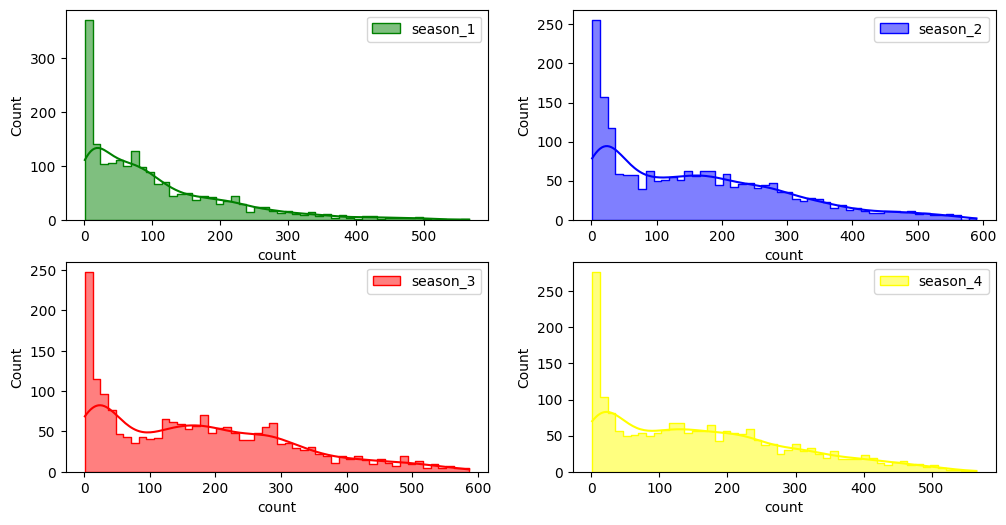

In [73]:
plt.figure(figsize = (12, 6))
plt.subplot(2, 2, 1)
sns.histplot(s1.sample(2000), bins = 50,
             element = 'step', color = 'green', kde = True, label = 'season_1')
plt.legend()
plt.subplot(2, 2, 2)
sns.histplot(s2.sample(2000), bins = 50,
             element = 'step', color = 'blue', kde = True, label = 'season_2')
plt.legend()
plt.subplot(2, 2, 3)
sns.histplot(s3.sample(2000), bins = 50,
             element = 'step', color = 'red', kde = True, label = 'season_3')
plt.legend()
plt.subplot(2, 2, 4)
sns.histplot(s4.sample(2000), bins = 50,
             element = 'step', color = 'yellow', kde = True, label = 'season_4')
plt.legend()
plt.plot()

* All the histograms are right skewed and not follow normal distribution

*Check Distribution using QQ Plot*

In [49]:
from statsmodels.graphics.gofplots import qqplot
import scipy.stats as spy

[]

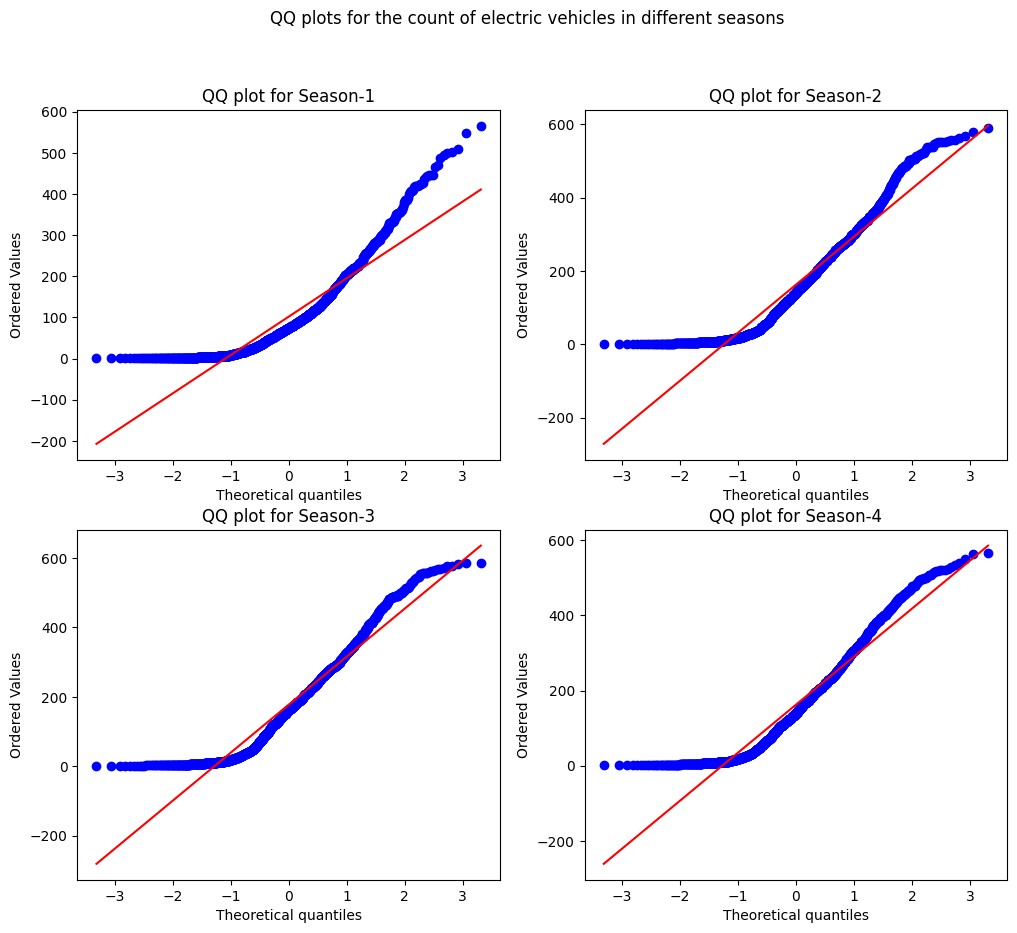

In [74]:
plt.figure(figsize = (12, 10))
plt.subplot(2, 2, 1)
plt.suptitle('QQ plots for the count of electric vehicles in different seasons')
spy.probplot(s1.sample(1500), plot = plt, dist = 'norm')
plt.title('QQ plot for Season-1')
plt.subplot(2, 2, 2)
spy.probplot(s2.sample(1500), plot = plt, dist = 'norm')
plt.title('QQ plot for Season-2')
plt.subplot(2, 2, 3)
spy.probplot(s3.sample(1500), plot = plt, dist = 'norm')
plt.title('QQ plot for Season-3')
plt.subplot(2, 2, 4)
spy.probplot(s4.sample(1500), plot = plt, dist = 'norm')
plt.title('QQ plot for Season-4')
plt.plot()

* Above QQ Plots do not show linearity and therefore do not follow normal distribution

Check Distribution using **Shapiro-Wilk Test**

H0: The sample follow Normal Distribution

H1: The sample do not follow Normal Distribution

alpha = 0.05

In [57]:
from scipy.stats import shapiro

In [108]:
t1,p1=shapiro(s1.sample(500))
t2,p2=shapiro(s2.sample(500))
t3,p3=shapiro(s3.sample(500))
t4,p4=shapiro(s4.sample(500))
p1,p2,p3

(6.969372284767888e-21, 6.834976090289808e-15, 1.609095148791262e-11)

In [109]:
print('P-value :',p1)
if p_value < 0.05:
    print('Reject H0: The sample do not follow Normal Distribution')
else:
    print('Fail to Reject H0: The sample follow Normal Distribution')

P-value : 6.969372284767888e-21
Reject H0: The sample do not follow Normal Distribution


Check Homogeneity of Variances using **Levene's Test**

In [66]:
import scipy.stats as spy

In [89]:
# Null Hypothesis(H0) - Homogenous Variance

# Alternate Hypothesis(HA) - Non Homogenous Variance

test_stat, p_value = spy.levene(s1.sample(1500),s2.sample(1500),
                                s3.sample(1500),s4.sample(1500))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 9.725520100418748e-50
The samples do not have  Homogenous Variance


Since the samples are not normally distributed and do not have the same variance, f_oneway test cannot be performed here, we can perform its non parametric equivalent test i.e., **Kruskal-Wallis test** for independent samples.

In [80]:
# Ho : Mean no. of bikes is same for different seasons
# Ha : Mean no. of bikes is different for for atleast 2 seasons
# Assuming significance Level to be 0.05
alpha = 0.05
test_stat, p_value = spy.kruskal(s1,s2,s3,s4)
print('Test Statistic =', test_stat)
print('p value =', p_value)

Test Statistic = 429.4814657501883
p value = 9.092946705054743e-93


In [82]:
if p_value < alpha:
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Reject Null Hypothesis


INSIGHTS:

The number of bikes rented is statistically different for atleast 2 seasons. Basis this information marketing and service support needs to gear up accordingly.

**Check if the Weather conditions are significantly different during different Seasons?**

In [83]:
dfiqr[['weather', 'season']].describe()

,weather,season
count,9518,9518
unique,4,4
top,1,4
freq,6176,2475


**STEP-1** : Set up Null Hypothesis

Null Hypothesis ( H0 ) - weather and season are independent of each other

Alternate Hypothesis ( HA ) - weather is dependent on season and vice-versa

**STEP-2**: Define Test statistics

Since we have two categorical features, the **Chi- square test** is applicable here. Under H0, the test statistic should follow Chi-Square Distribution.

**STEP-3**: Checking for basic assumptons for the hypothesis (Non-Parametric Test)

1. The data in the cells should be frequencies, or counts of cases.
2. The levels (or categories) of the variables are mutually exclusive. That is, a particular subject fits into one and only one level of each of the variables.
3. There are 2 variables, and both are measured as categories.
4. The value of the cell expecteds should be 5 or more in at least 80% of the cells, and no cell should have an expected of less than one.

**STEP-4**: Compute the p-value and fix value of alpha.

we will be computing the chi square-test p-value using the chi2_contingency function using scipy.stats. We set our alpha to be 0.05

**STEP-5**: Compare p-value and alpha.

Based on p-value, we will accept or reject H0.

p-val > alpha : Accept H0
p-val < alpha : Reject H0

In [84]:
crosstable= pd.crosstab(dfiqr['weather'], dfiqr['season'])
crosstable

season,1,2,3,4
weather,,,,
1,1595,1473,1598,1510
2,683,614,517,754
3,184,205,173,211
4,1,0,0,0


Since the above contingency table has one column in which the count of the rented electric vehicle is less than 5 in most of the cells, we can remove the weather 4 and then proceed further.

In [85]:
from scipy.stats import chi2_contingency

In [104]:
cross_table2 = pd.crosstab(index = dfiqr['season'],
                          columns = dfiqr.loc[dfiqr['weather'] != 4, 'weather'])
cross_table2

weather,1,2,3
season,,,
1,1595,683,184
2,1473,614,205
3,1598,517,173
4,1510,754,211


In [105]:
chi2_contingency(cross_table2)

Chi2ContingencyResult(statistic=47.08769822617923, pvalue=1.797264261807596e-08, dof=6, expected_freq=array([[1597.70011558,  664.328675  ,  199.97120941],
       [1487.37963644,  618.45707681,  186.16328675],
       [1484.78386046,  617.37774509,  185.83839445],
       [1606.13638752,  667.8365031 ,  201.02710938]]))

In [106]:
chi_test_stat, p_value, dof, expected=chi2_contingency(cross_table2)
print('Test Statistic =', chi_test_stat)
print('p value =', p_value)

Test Statistic = 47.08769822617923
p value = 1.797264261807596e-08


In [107]:
if p_value < alpha:
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Reject Null Hypothesis


* Above Analysis infers that weather and season are dependent on each other

# Recommendations

- **Collaborations with Weather Services**: Consider collaborating with weather services to provide real-time weather updates and forecasts to potential customers. Incorporate weather information into your marketing campaigns or rental app to showcase the ideal biking conditions and attract users who prefer certain weather conditions.

- **Seasonal Bike Maintenance**: Allocate resources for seasonal bike maintenance. Before the peak seasons, conduct thorough maintenance checks on the bike fleet to ensure they are in top condition. Regularly inspect and service bikes throughout the year to prevent breakdowns and maximize customer satisfaction.

- **Customer Feedback and Reviews**: Encourage customers to provide feedback and reviews on their biking experience. Collecting feedback can help identify areas for improvement, understand customer preferences, and tailor the services to better meet customer expectations.

- **Social Media Marketing**: Leverage social media platforms to promote the electric bike rental services. Share captivating visuals of biking experiences in different weather conditions, highlight customer testimonials, and engage with potential customers through interactive posts and contests. Utilize targeted advertising campaigns to reach specific customer segments and drive more bookings.

- **Special Occasion Discounts**: Since Yulu focusses on providing a sustainable solution for vehicular pollution, it should give special discounts on the occassions like Zero Emissions Day (21st September), Earth day (22nd April), World Environment Day (5th June) etc in order to attract new users.

- **Seasonal Marketing**: Since there is a clear seasonal pattern in the count of rental bikes, Yulu can adjust its marketing strategies accordingly. Focus on promoting bike rentals during the spring and summer months when there is higher demand. Offer seasonal discounts or special packages to attract more customers during these periods.

- **Time-based Pricing**: Take advantage of the hourly fluctuation in bike rental counts throughout the day. Consider implementing time-based pricing where rental rates are lower during off-peak hours and higher during peak hours. This can encourage customers to rent bikes during less busy times, balancing out the demand and optimizing the resources.

- **Weather-based Promotions**: Recognize the impact of weather on bike rentals. Create weather-based promotions that target customers during clear and cloudy weather, as these conditions show the highest rental counts. Yulu can offer weather-specific discounts to attract more customers during these favorable weather conditions.

- **User Segmentation**: Given that around 81% of users are registered, and the remaining 19% are casual, Yulu can tailor its marketing and communication strategies accordingly. Provide loyalty programs, exclusive offers, or personalized recommendations for registered users to encourage repeat business. For casual users, focus on providing a seamless rental experience and promoting the benefits of bike rentals for occasional use.

- **Optimize Inventory**: Analyze the demand patterns during different months and adjust the inventory accordingly. During months with lower rental counts such as January, February, and March, Yulu can optimize its inventory levels to avoid excess bikes. On the other hand, during peak months, ensure having sufficient bikes available to meet the higher demand.

- **Improve Weather Data Collection**: Given the lack of records for extreme weather conditions, consider improving the data collection process for such scenarios. Having more data on extreme weather conditions can help to understand customer behavior and adjust the operations accordingly, such as offering specialized bike models for different weather conditions or implementing safety measures during extreme weather.